In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import geopandas as gp

### 教學
https://www.slideshare.net/ssusereaac8d/from-pandas-to-geopandas

In [2]:
villages_shp = gp.read_file("town_shp/TOWN_MOI_1060525.shp") #全台灣鄉里圖

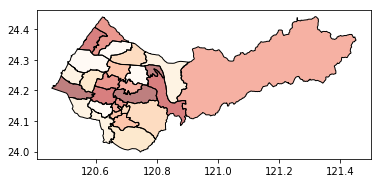

In [3]:
taichung_shp = villages_shp.query('COUNTYNAME=="臺中市"') #臺中市鄉里圖
taichung_shp.plot(cmap='OrRd',)
plt.show()

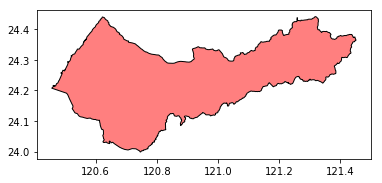

In [4]:
# 把全台中市取聯集
from shapely.ops import cascaded_union
mergedpoly = gp.GeoSeries(cascaded_union(taichung_shp['geometry']))
mergedpoly.plot(color = 'red')
plt.show()

In [5]:
# 建立以縣市為單位的 GeoDataframe
taiwan_county_shp = gp.GeoDataFrame({'COUNTYNAME':villages_shp['COUNTYNAME'].unique(),
                                      'geometry':None}, crs=villages_shp.crs)

In [6]:
# 兩種方法二選一
if(False):
    for i in taiwan_county_shp.index[:3]:
        taiwan_county_shp.iloc[i]['geometry'] = gp.GeoSeries(
            cascaded_union(
                villages_shp.query(
                    'COUNTYNAME=="{}"'.format(
                        taiwan_county_shp['COUNTYNAME'][i]))['geometry']))
else:
    taiwan_county_shp = villages_shp.dissolve(by=['COUNTYNAME'])

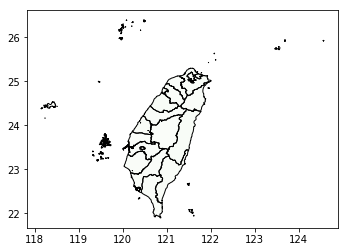

In [7]:
# 繪出台灣縣市圖
taiwan_county_shp.plot(cmap = plt.cm.Greens)
plt.show()